In [11]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import svm

import pipeline as pline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Import Summary Results

In [12]:
# import summary results

files = ["elastic_net_fs_search.csv",
         "elastic_net_fs_search_poly_2.csv",
         "elastic_net_fs_search_poly_3.csv",
         "lasso_fs_search.csv",
         "lasso_fs_search_2.csv",
         "lasso_fs_search_3.csv",
         "ridge_fs_search.csv",
         "ridge_fs_search_poly_2.csv",
         "ridge_fs_search_poly_3.csv",
         "SVR_summary_all.csv",
         "rf_summary.csv"]

df = pd.DataFrame()

for file in files:
    
    new_df = pd.read_csv("../model_outputs/" + file)
    
    if file[0:11]=="elastic_net":
        new_df["model"] = "elastic net"
        if file[-5].isnumeric():
            new_df["degree"] = file[-5]
    elif file[0:5]=="lasso":
        new_df["model"] = "lasso"
        if file[-5].isnumeric():
            new_df["degree"] = file[-5]
    elif file[0:5]=="ridge":
        new_df["model"] = "ridge"
        if file[-5].isnumeric():
            new_df["degree"] = file[-5]
    elif file[0:2]=="rf":
        new_df["model"] = "random forest"
        
    df = pd.concat([df, new_df], axis=0)

# reorder columns into a slightly more helpful order
df = df.drop(columns = ["Unnamed: 0"])
cols = df.columns.tolist()
cols = [cols[5]] + [cols[2]] + [cols[4]] + [cols[3]] + cols[0:2] + cols[6:]
df = df[cols]
df.head()

,model,neg_mean_squared_error,neg_mean_absolute_error,r2,alpha,l1_ratio,degree,kernel,C,epsilon,rf__criterion,rf__max_features,rf__max_depth,rf__min_samples_split
0,elastic net,-1201.863136,-8.908714,0.914382,0.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,elastic net,-1196.972767,-8.861287,0.915117,0.1,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,elastic net,-1192.719479,-8.810556,0.915888,0.1,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,elastic net,-1189.654017,-8.758637,0.916733,0.1,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,elastic net,-1189.142098,-8.706644,0.917567,0.1,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
def read_data(data, date_type=False):
    print(date_type)
    if date_type:
        df = pd.read_csv(data)
    else:
        #parser = lambda date: pd.datetime.strptime(date, '%d%b%Y')
        df = pd.read_csv(data, parse_dates=["date"], dtype={'fips': str})
    return df

X_train = read_data("../Data/Train-Test Set/X_train.csv").drop(columns="date")
X_test = read_data("../Data/Train-Test Set/X_test.csv").drop(columns="date")
y_train = read_data("../Data/Train-Test Set/y_train.csv", True)
y_test = read_data("../Data/Train-Test Set/y_test.csv", True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

False
False
True
True
(71992, 15) (17998, 15) (71992, 1) (17998, 1)


## Determine Best Models

In [4]:
best_models = []

### Model with the best mean squared error performance

In [5]:
df.sort_values(by="neg_mean_squared_error", ascending=False).head(1)

,model,neg_mean_squared_error,neg_mean_absolute_error,r2,alpha,l1_ratio,degree,kernel,C,epsilon,rf__criterion,rf__max_features,rf__max_depth,rf__min_samples_split
36,random forest,-902.19953,-7.58276,0.949379,NaN,NaN,NaN,NaN,NaN,NaN,mae,auto,NaN,2.0


In [6]:
# add model to list
best_mse_model_overall = RandomForestRegressor(criterion = "mae", max_features="auto", 
                                               max_depth=None, min_samples_split=2, verbose=2, n_jobs=-1)

best_models.append(best_mse_model_overall.fit(X_train, np.array(y_train).ravel()))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 46.3min


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 122.1min finished


### Model with the best mean absolute error performance

In [7]:
# get best neg_mean_absolute_error model
df.sort_values(by="neg_mean_absolute_error", ascending=False).head(1)

,model,neg_mean_squared_error,neg_mean_absolute_error,r2,alpha,l1_ratio,degree,kernel,C,epsilon,rf__criterion,rf__max_features,rf__max_depth,rf__min_samples_split
24,SVR,-1146.115604,-7.114552,0.944115,NaN,NaN,NaN,linear,20.0,0.0,NaN,NaN,NaN,NaN


In [8]:
# add model to list
best_mae_model_overall = svm.SVR(C=20, epsilon=0, kernel="linear")

best_models.append(best_mae_model_overall.fit(X_train, np.array(y_train).ravel()))

### Model with the best r2 performance

In [9]:
# get best r2 model
df.sort_values(by="r2", ascending=False).head(1)

,model,neg_mean_squared_error,neg_mean_absolute_error,r2,alpha,l1_ratio,degree,kernel,C,epsilon,rf__criterion,rf__max_features,rf__max_depth,rf__min_samples_split
36,random forest,-902.19953,-7.58276,0.949379,NaN,NaN,NaN,NaN,NaN,NaN,mae,auto,NaN,2.0


This is the same random forest model as above so no need to retrain

## Let's just add in some other better performers

### Best Random Forest Model by MAE

In [40]:
# best rf models
rfs = df[(df["model"]=="random forest")]
rfs.sort_values(by="neg_mean_absolute_error", ascending=False).head(1)

,model,neg_mean_squared_error,neg_mean_absolute_error,r2,alpha,l1_ratio,degree,kernel,C,epsilon,rf__criterion,rf__max_features,rf__max_depth,rf__min_samples_split
6,random forest,-974.920992,-7.521976,0.944697,NaN,NaN,NaN,NaN,NaN,NaN,mse,log2,NaN,2.0


In [11]:
# add model to list
best_models.append(RandomForestRegressor(criterion = "mse", max_features="log2", 
                                               max_depth=None, min_samples_split=2, n_jobs=-1)\
                       .fit(X_train, np.array(y_train).ravel()))

### Best Elastic Net/Ridge/Lasso Models by R2

In [12]:
# best elastic net, ridge, or lasso models
regs = df[(df["model"]=="elastic net") | (df["model"]=="ridge") | (df["model"]=="lasso")]
regs.sort_values(by="r2", ascending=False).head(1)

,model,neg_mean_squared_error,neg_mean_absolute_error,r2,alpha,l1_ratio,degree,kernel,C,epsilon,rf__criterion,rf__max_features,rf__max_depth,rf__min_samples_split
10,ridge,-1438.062773,-8.335918,0.930791,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
best_models.append(Ridge(alpha=1).fit(X_train, np.array(y_train).ravel()))

### Best Elastic Net/Ridge/Lasso Models by mean squared error

In [14]:
regs.sort_values(by="neg_mean_squared_error", ascending=False).head(1)

,model,neg_mean_squared_error,neg_mean_absolute_error,r2,alpha,l1_ratio,degree,kernel,C,epsilon,rf__criterion,rf__max_features,rf__max_depth,rf__min_samples_split
5,elastic net,-1188.039293,-8.649833,0.918618,0.1,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
best_models.append(ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X_train, np.array(y_train).ravel()))

### Best Elastic Net/Ridge/Lasso Models by mean absolute error

In [16]:
regs.sort_values(by="neg_mean_absolute_error", ascending=False).head(1)

,model,neg_mean_squared_error,neg_mean_absolute_error,r2,alpha,l1_ratio,degree,kernel,C,epsilon,rf__criterion,rf__max_features,rf__max_depth,rf__min_samples_split
0,lasso,-3456.759656,-8.040768,0.895513,0.1,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
best_reg_model_mae = Lasso(alpha = 1)
X_poly = poly_features.fit_transform(X_train)
best_models.append(best_reg_model_mae.fit(X_poly, y_train))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5988571.558489876, tolerance: 120584.43984877077
  positive)


### Best SVR model by r2

In [18]:
# best svr or svrlinear models
svrs = df[(df["model"]=="SVR") | (df["model"]=="LinearSVR")]
svrs.sort_values(by="r2", ascending=False).head(1)

,model,neg_mean_squared_error,neg_mean_absolute_error,r2,alpha,l1_ratio,degree,kernel,C,epsilon,rf__criterion,rf__max_features,rf__max_depth,rf__min_samples_split
24,SVR,-1146.115604,-7.114552,0.944115,NaN,NaN,NaN,linear,20.0,0.0,NaN,NaN,NaN,NaN


This is the same model as the best model by MAE so no need to run

### Best SVR model by mse

In [19]:
svrs.sort_values(by="neg_mean_squared_error", ascending=False).head(1)

,model,neg_mean_squared_error,neg_mean_absolute_error,r2,alpha,l1_ratio,degree,kernel,C,epsilon,rf__criterion,rf__max_features,rf__max_depth,rf__min_samples_split
66,LinearSVR,-1078.422682,-7.239326,0.939882,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN


In [20]:
best_models.append(svm.LinearSVR(C=1, epsilon=0).fit(X_train, np.array(y_train).ravel()))

## Evaluate best models on test data

In [21]:
best_models

[RandomForestRegressor(criterion='mae', n_jobs=-1, verbose=2),
 SVR(C=20, epsilon=0, kernel='linear'),
 RandomForestRegressor(max_features='log2', n_jobs=-1),
 Ridge(alpha=1),
 ElasticNet(alpha=0.1),
 Lasso(alpha=1),
 LinearSVR(C=1, epsilon=0)]

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

ev = pd.DataFrame(columns = ["Model", "MAE", "MSE", "R2", "Bias", "Variance", "RSS"])

for model in best_models:
    print(model)
    
    try:
        model.predict(X_test)
    except:
        poly_features = PolynomialFeatures(degree=2)
        model_test_X =  poly_features.fit_transform(X_test)
        model_train_X = poly_features.fit_transform(X_train)
    else:
        model_test_X = X_test
        model_train_X = X_train
    
    predictions = model.predict(model_test_X)
        
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(predictions, y_test)
    bias = mean_squared_error(model.predict(model_train_X),np.array(y_train))
    rss = np.sum((predictions-np.array(y_test))**2)
    variance = model.score(model_train_X, y_train)
    
    print("MAE: ", mae)
    print("MSE: ", mse)
    print("Bias:", bias)
    print("RSS:", rss)
    print("Variance:", variance)
    print("R-squared:", r2)
    
    ev = ev.append({"Model": str(model), 
                        "MAE": mae,
                        "MSE": mse,
                        "R2": r2,
                        "Bias": bias,
                        "Variance": variance,
                        "RSS": rss},
                        ignore_index = True)

    
    print("\n")
    
ev

RandomForestRegressor(criterion='mae', n_jobs=-1, verbose=2)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished


MAE:  3.4247999777753084
MSE:  151.20201127069674
Bias: 26.178245003611515
RSS: 7085530280560.022
Variance: 0.9984370917038189
R-squared: 0.9860748439516167


SVR(C=20, epsilon=0, kernel='linear')
MAE:  6.132815819685517
MSE:  588.7384091700125
Bias: 871.1861720572824
RSS: 6589225156214.253
Variance: 0.9479879535225231
R-squared: 0.9368600481106242


RandomForestRegressor(max_features='log2', n_jobs=-1)
MAE:  3.2814930620598055
MSE:  137.08728999390533
Bias: 28.52696105961171
RSS: 7036953198710.332
Variance: 0.9982968673377932
R-squared: 0.9871979570987878


Ridge(alpha=1)
MAE:  6.87074537029446
MSE:  580.5369190442858
Bias: 787.2850081891063
RSS: 6926396948917.307
Variance: 0.9529970679628048
R-squared: 0.9440009082746814


ElasticNet(alpha=0.1)
MAE:  7.628666559816443
MSE:  671.0196120810443
Bias: 910.2198050063205
RSS: 6874424930515.0205
Variance: 0.9456575456301022
R-squared: 0.9342551984116745


Lasso(alpha=1)
MAE:  6.655139470486812
MSE:  363.33751926134255
Bias: 438.527049136352

,Model,MAE,MSE,R2,Bias,Variance,RSS
0,"RandomForestRegressor(criterion='mae', n_jobs=...",3.424800,151.202011,0.986075,26.178245,0.998437,7.085530e+12
1,"SVR(C=20, epsilon=0, kernel='linear')",6.132816,588.738409,0.936860,871.186172,0.947988,6.589225e+12
2,"RandomForestRegressor(max_features='log2', n_j...",3.281493,137.087290,0.987198,28.526961,0.998297,7.036953e+12
3,Ridge(alpha=1),6.870745,580.536919,0.944001,787.285008,0.952997,6.926397e+12
4,ElasticNet(alpha=0.1),7.628667,671.019612,0.934255,910.219805,0.945658,6.874425e+12
5,Lasso(alpha=1),6.655139,363.337519,0.964089,438.527049,0.973819,6.845687e+12
6,"LinearSVR(C=1, epsilon=0)",6.131381,593.896629,0.935693,880.193913,0.947450,6.560485e+12


In [56]:
ev.to_csv("../model_outputs/Best_Models_Scores.csv")

In [23]:
ev.sort_values(by="MAE")

,Model,MAE,MSE,R2,Bias,Variance,RSS
2,"RandomForestRegressor(max_features='log2', n_j...",3.281493,137.087290,0.987198,28.526961,0.998297,7.036953e+12
0,"RandomForestRegressor(criterion='mae', n_jobs=...",3.424800,151.202011,0.986075,26.178245,0.998437,7.085530e+12
6,"LinearSVR(C=1, epsilon=0)",6.131381,593.896629,0.935693,880.193913,0.947450,6.560485e+12
1,"SVR(C=20, epsilon=0, kernel='linear')",6.132816,588.738409,0.936860,871.186172,0.947988,6.589225e+12
5,Lasso(alpha=1),6.655139,363.337519,0.964089,438.527049,0.973819,6.845687e+12
3,Ridge(alpha=1),6.870745,580.536919,0.944001,787.285008,0.952997,6.926397e+12
4,ElasticNet(alpha=0.1),7.628667,671.019612,0.934255,910.219805,0.945658,6.874425e+12


The best model is the RandomForestRegressor with max_features="log2"!

## Get feature importance of best model

In [32]:
best_model = best_models[2]

In [33]:
feature_importance = pd.DataFrame({"features": X_train.columns.to_list(), 
                                   "importance": best_model.feature_importances_ })

feature_importance.sort_values(by="importance", ascending = False)

,features,importance
0,new_cases_7avg,0.244392
2,new_cases,0.183286
9,prev_day_adult_admit_7daysum,0.162867
14,prev_day_adult_admit_50-59_7daysum,0.116319
12,prev_day_adult_admit_80+_7daysum,0.074371
6,cumulative_cases,0.058826
1,2weeksago_cases_7avg,0.054679
5,age_35_44,0.031427
4,white,0.023240
3,age_45_54,0.021172


## Plot the results

In [66]:
ev["Model Family"] = (ev["Model"].str.split("(")).map(lambda x: x[0].replace("LinearSVR", "SVR"))
ev.loc[ev['Model Family'] =="RandomForestRegressor", "Model Family"] = "Random Forest"
ev.loc[ev['Model Family'] =="ElasticNet", "Model Family"] = "Elastic Net"
ev

,Model,MAE,MSE,R2,Bias,Variance,RSS,Model Family
0,"RandomForestRegressor(criterion='mae', n_jobs=...",3.424800,151.202011,0.986075,26.178245,0.998437,7.085530e+12,Random Forest
1,"SVR(C=20, epsilon=0, kernel='linear')",6.132816,588.738409,0.936860,871.186172,0.947988,6.589225e+12,SVR
2,"RandomForestRegressor(max_features='log2', n_j...",3.281493,137.087290,0.987198,28.526961,0.998297,7.036953e+12,Random Forest
3,Ridge(alpha=1),6.870745,580.536919,0.944001,787.285008,0.952997,6.926397e+12,Ridge
4,ElasticNet(alpha=0.1),7.628667,671.019612,0.934255,910.219805,0.945658,6.874425e+12,Elastic Net
5,Lasso(alpha=1),6.655139,363.337519,0.964089,438.527049,0.973819,6.845687e+12,Lasso
6,"LinearSVR(C=1, epsilon=0)",6.131381,593.896629,0.935693,880.193913,0.947450,6.560485e+12,SVR


Text(0, 0.5, 'Variance')

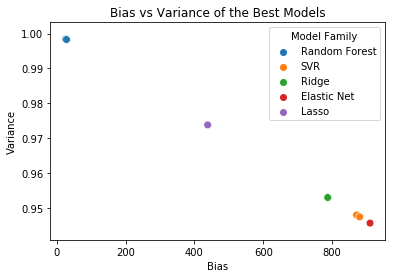

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x="Bias", y="Variance", data=ev, hue="Model Family", s=60)
plt.title("Bias vs Variance of the Best Models")
plt.xlabel("Bias")
plt.ylabel("Variance")

Text(0, 0.5, 'R Squared')

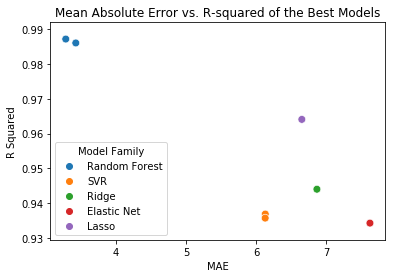

In [68]:
import seaborn as sns

sns.scatterplot(x="MAE", y="R2", data=ev, hue="Model Family", s=60)
plt.title("Mean Absolute Error vs. R-squared of the Best Models")
plt.xlabel("MAE")
plt.ylabel("R Squared")

Text(0, 0.5, 'MSE')

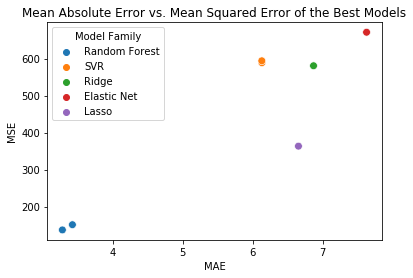

In [69]:
import seaborn as sns

sns.scatterplot(x="MAE", y="MSE", data=ev, hue="Model Family", s=60)
plt.title("Mean Absolute Error vs. Mean Squared Error of the Best Models")
plt.xlabel("MAE")
plt.ylabel("MSE")

In [46]:
best_predictions = best_model.predict(X_test)

## Use Best Model to predict cases next week for the last week in our data

In [27]:
################################################################
# have to grab original X_train data to normalize consistently #
################################################################

from sklearn.model_selection import train_test_split

df = pd.read_csv("../Data/merged.csv", parse_dates=["date"], dtype={'fips': str})

# filter down to dates with hospital
date_mask = (df["date"]>='7-31-2020')
df = df[date_mask]

# drop grocery_pharm, parks, transit because they have too much missingness
df.drop(columns=["grocery_pharm", "parks", "transit", "residential"], inplace = True)

# fill na's with mean for that state that date for retail_rec, workplace [TO DO: IS THIS REASONABLE?]
for var in ["retail_rec", "workplace"]:
    df[var] = df[["state", "date", var]].groupby(["state", "date"]).transform(lambda x: x.fillna(x.mean()))

# fill missing masks with 0 because the missings are from MO, who doesn't have a mask mandate
df["mask_mandate"] = df["mask_mandate"].fillna(0)

# drop na's (should just be the last week for each fips)
df = df.dropna()

# split df into features and labels
temp_X = df.drop(columns=["cases_next_week"])
temp_y = df["cases_next_week"]

# split df into train and test
temp_X_train, temp_X_test, temp_y_train, temp_y_test = train_test_split(temp_X, temp_y, random_state=0, test_size=0.2)

In [48]:
# grab final week of data that doesn't have y's
merged = pd.read_csv("../Data/merged.csv", parse_dates=["date"], dtype={"fips":str})
final_week = merged[merged["cases_next_week"].isnull()]
final_week["retail_rec"] = final_week[["state", "retail_rec"]]\
                            .groupby(["state"]).transform(lambda x: x.fillna(x.mean()))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [49]:
# normalize final_week
numerical_features = temp_X_train.columns.tolist()[4:]
numerical_features.remove('mask_mandate')

temp_X_train, final_week = pline.normalize(temp_X_train, final_week, numerical_features)

In [50]:
# make predictions using best model
final_week_predictions = final_week[["state", "county", "date", "fips"]]
final_week_predictions["predicted"] = best_model.predict(final_week[X_train.columns.to_list()])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
# match with date
from datetime import timedelta
final_week_predictions["7 days from now"] = final_week_predictions["date"] + + timedelta(days=7)

final_week_predictions = final_week_predictions.drop(columns=["date"])
final_week_predictions.rename(columns={"7 days from now": "date"}, inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
# merge on true cases form NYT
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
nyt = pd.read_csv(url, parse_dates=["date"], dtype={"fips": str})
nyt['new_cases'] = nyt.groupby(["state", "fips", "county"])['cases'].diff()

final_week_predictions = final_week_predictions.merge(nyt.drop(columns=["state", "county"]), 
                                                      on=["date", "fips"], how="left")\
                                               .drop(columns=["cases", "deaths"])

In [53]:
final_week_predictions["predicted"] = round(final_week_predictions["predicted"])
final_week_predictions["residual"] = final_week_predictions["new_cases"] - final_week_predictions["predicted"]
final_week_predictions.head()

,state,county,fips,predicted,date,new_cases,residual
0,IL,Adams,17001,10.0,2021-05-28,4.0,-6.0
1,IL,Adams,17001,10.0,2021-05-29,5.0,-5.0
2,IL,Adams,17001,10.0,2021-05-30,5.0,-5.0
3,IL,Adams,17001,11.0,2021-05-31,1.0,-10.0
4,IL,Adams,17001,10.0,2021-06-01,4.0,-6.0


In [55]:
final_week_predictions.to_csv("../model_outputs/Final Week Predictions.csv")

### Add population to final predictions

In [7]:
final_week_predictions = pd.read_csv("../model_outputs/Final Week Predictions.csv").drop(columns=["Unnamed: 0"])
merged = pd.read_csv("../Data/Merged.csv")[["fips", "total_pop"]].drop_duplicates()

In [8]:
merged.head()

,fips,total_pop
0,17001,66085
434,17003,6260
841,17005,16589
1266,17007,53537
1684,17009,6628


In [9]:
final_week_predictions  = final_week_predictions.merge(merged, on=["fips"])
final_week_predictions.head()

,state,county,fips,predicted,date,new_cases,residual,total_pop
0,IL,Adams,17001,10.0,2021-05-28,4.0,-6.0,66085
1,IL,Adams,17001,10.0,2021-05-29,5.0,-5.0,66085
2,IL,Adams,17001,10.0,2021-05-30,5.0,-5.0,66085
3,IL,Adams,17001,11.0,2021-05-31,1.0,-10.0,66085
4,IL,Adams,17001,10.0,2021-06-01,4.0,-6.0,66085


In [10]:
final_week_predictions.to_csv("../model_outputs/Final Week Predictions.csv")

## Best model predictions for peak week

In [19]:
best_model = RandomForestRegressor(criterion = "mse", max_features="log2", 
                                   max_depth=None, min_samples_split=2, n_jobs=-1)\
                       .fit(X_train, np.array(y_train).ravel())

In [28]:
################################################################
# have to grab original X_train data to normalize consistently #
################################################################

from sklearn.model_selection import train_test_split

df = pd.read_csv("../Data/merged.csv", parse_dates=["date"], dtype={'fips': str})

# filter down to dates with hospital
date_mask = (df["date"]>='7-31-2020')
df = df[date_mask]

# drop grocery_pharm, parks, transit because they have too much missingness
df.drop(columns=["grocery_pharm", "parks", "transit", "residential"], inplace = True)

# fill na's with mean for that state that date for retail_rec, workplace [TO DO: IS THIS REASONABLE?]
for var in ["retail_rec", "workplace"]:
    df[var] = df[["state", "date", var]].groupby(["state", "date"]).transform(lambda x: x.fillna(x.mean()))

# fill missing masks with 0 because the missings are from MO, who doesn't have a mask mandate
df["mask_mandate"] = df["mask_mandate"].fillna(0)

# drop na's (should just be the last week for each fips)
df = df.dropna()

# split df into features and labels
temp_X = df.drop(columns=["cases_next_week"])
temp_y = df["cases_next_week"]

# split df into train and test
temp_X_train, temp_X_test, temp_y_train, temp_y_test = train_test_split(temp_X, temp_y, random_state=0, test_size=0.2)

In [29]:
# grab final week of data that doesn't have y's
all_weeks = pd.read_csv("../Data/merged.csv", parse_dates=["date"], dtype={"fips":str})
all_weeks["retail_rec"] = all_weeks[["state", "retail_rec"]]\
                            .groupby(["state"]).transform(lambda x: x.fillna(x.mean()))

In [30]:
# normalize final_week
numerical_features = temp_X_train.columns.tolist()[4:]
numerical_features.remove('mask_mandate')

temp_X_train, all_weeks = pline.normalize(temp_X_train, all_weeks, numerical_features)

In [35]:
# make predictions using best model
date_mask = (all_weeks["date"]>='7-31-2020')
all_weeks = all_weeks[date_mask]

all_weeks_predictions = all_weeks[["state", "county", "date", "fips"]]
all_weeks_predictions["predicted"] = best_model.predict(all_weeks[X_train.columns.to_list()])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
# match with date
from datetime import timedelta
all_weeks_predictions["7 days from now"] = all_weeks_predictions["date"] + + timedelta(days=7)

all_weeks_predictions = all_weeks_predictions.drop(columns=["date"])
all_weeks_predictions.rename(columns={"7 days from now": "date"}, inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
merged = pd.read_csv("../Data/merged.csv", parse_dates=["date"], dtype={"fips":str})
all_weeks_predictions = all_weeks_predictions.merge(merged[["fips", "date", "new_cases_7avg", "total_pop"]], 
                                                    on=["fips", "date"], how="left")

In [59]:
peak_mask = (all_weeks_predictions["date"]>='1-3-2021') & (all_weeks_predictions["date"]<='1-9-2021')
peak_week = all_weeks_predictions[peak_mask]

In [60]:
peak_week.head()

,state,county,fips,predicted,date,new_cases_7avg_x,new_cases_7avg_y,total_pop
149,IL,Adams,17001,108.07,2021-01-03,118.0,118.0,66085.0
150,IL,Adams,17001,112.04,2021-01-04,137.0,137.0,66085.0
151,IL,Adams,17001,83.54,2021-01-05,120.0,120.0,66085.0
152,IL,Adams,17001,75.08,2021-01-06,104.0,104.0,66085.0
153,IL,Adams,17001,81.78,2021-01-07,87.0,87.0,66085.0


In [ ]:
peak_week.to_csv("../model_outputs/peak_week_predictions.csv")